In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Short Distance

In [3]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    # x = sequence
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, -1, -2, -3) # short distance
    #   y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

### Linear Model

In [14]:
# Try a LINEAR MODEL first - note: it is CLASSIFICATION now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 0s 5ms/step - loss: 0.7526 - accuracy: 0.4952 - val_loss: 0.6972 - val_accuracy: 0.5172
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5228 - val_loss: 0.6973 - val_accuracy: 0.5108
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5204 - val_loss: 0.6960 - val_accuracy: 0.4964
Epoch 4/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5216 - val_loss: 0.6960 - val_accuracy: 0.5056
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5064 - val_loss: 0.6950 - val_accuracy: 0.5132
Epoch 6/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5344 - val_loss: 0.6966 - val_accuracy: 0.5068
Epoch 7/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5220 - val_loss: 0.6957 - val_accuracy: 0.4968
Epoch 8/100
7

Epoch 59/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5300 - val_loss: 0.6983 - val_accuracy: 0.4928
Epoch 60/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5132 - val_loss: 0.6965 - val_accuracy: 0.5088
Epoch 61/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5168 - val_loss: 0.6963 - val_accuracy: 0.5000
Epoch 62/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5360 - val_loss: 0.6980 - val_accuracy: 0.5064
Epoch 63/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5284 - val_loss: 0.6978 - val_accuracy: 0.5040
Epoch 64/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.5200 - val_loss: 0.6962 - val_accuracy: 0.5112
Epoch 65/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5228 - val_loss: 0.6967 - val_accuracy: 0.5056
Epoch 

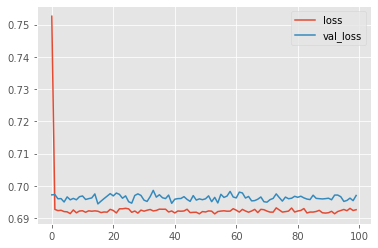

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

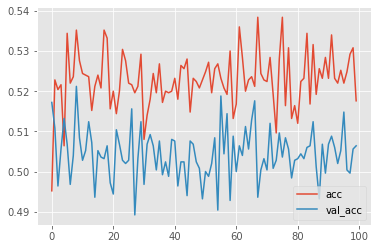

In [16]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Simple RNN

In [24]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(lr=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

In [25]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6957 - accuracy: 0.5148 - val_loss: 0.6815 - val_accuracy: 0.5436
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6688 - accuracy: 0.5808 - val_loss: 0.6615 - val_accuracy: 0.5940
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6360 - accuracy: 0.6560 - val_loss: 0.6211 - val_accuracy: 0.6900
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5798 - accuracy: 0.7356 - val_loss: 0.5586 - val_accuracy: 0.7296
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5014 - accuracy: 0.7892 - val_loss: 0.4818 - val_accuracy: 0.7768
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.4315 - accuracy: 0.8236 - val_loss: 0.4067 - val_accuracy: 0.8300
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.8712 - val_loss: 0.3443 - val_accuracy: 0.8708
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1383 - accuracy: 0.9576 - val_loss: 0.1526 - val_accuracy: 0.9488
Epoch 60/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1340 - accuracy: 0.9620 - val_loss: 0.1583 - val_accuracy: 0.9416
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1377 - accuracy: 0.9564 - val_loss: 0.1553 - val_accuracy: 0.9408
Epoch 62/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.9488 - val_loss: 0.1860 - val_accuracy: 0.9312
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1593 - accuracy: 0.9460 - val_loss: 0.1448 - val_accuracy: 0.9496
Epoch 64/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1346 - accuracy: 0.9660 - val_loss: 0.1497 - val_accuracy: 0.9472
Epoch 65/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1354 - accuracy: 0.9592 - val_loss: 0.1397 - val_accuracy: 0.9584
Epoch 

79/79 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9672 - val_loss: 0.1138 - val_accuracy: 0.9636
Epoch 174/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1184 - accuracy: 0.9580 - val_loss: 0.1161 - val_accuracy: 0.9632
Epoch 175/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1090 - accuracy: 0.9664 - val_loss: 0.1376 - val_accuracy: 0.9508
Epoch 176/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1099 - accuracy: 0.9640 - val_loss: 0.1215 - val_accuracy: 0.9572
Epoch 177/200
79/79 [==============================] - 0s 3ms/step - loss: 0.1246 - accuracy: 0.9556 - val_loss: 0.1222 - val_accuracy: 0.9548
Epoch 178/200
79/79 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.9684 - val_loss: 0.1127 - val_accuracy: 0.9680
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.1082 - accuracy: 0.9592 - val_loss: 0.1404 - val_accuracy: 0.9436
Epoch 180/200

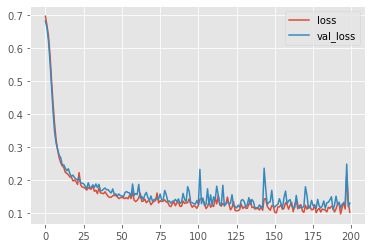

In [26]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

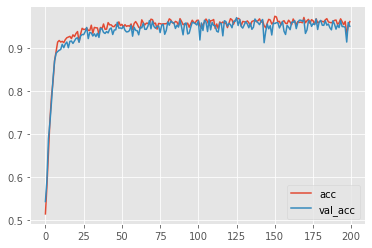

In [27]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Long Distance

In [28]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

### Simple RNN

In [32]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7043 - accuracy: 0.5088 - val_loss: 0.6941 - val_accuracy: 0.5112
Epoch 2/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5164 - val_loss: 0.6958 - val_accuracy: 0.5084
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5268 - val_loss: 0.6952 - val_accuracy: 0.5116
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.5088 - val_loss: 0.6948 - val_accuracy: 0.4964
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5056 - val_loss: 0.6954 - val_accuracy: 0.5092
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.5292 - val_loss: 0.6911 - val_accuracy: 0.5280
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6879 - accuracy: 0.5536 - val_loss: 0.6875 - val_accuracy: 0.5496
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5822 - accuracy: 0.7044 - val_loss: 0.5742 - val_accuracy: 0.7136
Epoch 60/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5339 - accuracy: 0.7436 - val_loss: 0.5335 - val_accuracy: 0.7560
Epoch 61/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5174 - accuracy: 0.7680 - val_loss: 0.5897 - val_accuracy: 0.7220
Epoch 62/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5476 - accuracy: 0.7508 - val_loss: 0.5820 - val_accuracy: 0.7224
Epoch 63/200
79/79 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.7328 - val_loss: 0.6481 - val_accuracy: 0.6588
Epoch 64/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6196 - accuracy: 0.6668 - val_loss: 0.6671 - val_accuracy: 0.6384
Epoch 65/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6298 - accuracy: 0.6668 - val_loss: 0.6504 - val_accuracy: 0.6424
Epoch 

79/79 [==============================] - 0s 3ms/step - loss: 0.6623 - accuracy: 0.6072 - val_loss: 0.6777 - val_accuracy: 0.5892
Epoch 174/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.6284 - val_loss: 0.6716 - val_accuracy: 0.5976
Epoch 175/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.6228 - val_loss: 0.6694 - val_accuracy: 0.5936
Epoch 176/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6136 - val_loss: 0.6697 - val_accuracy: 0.5872
Epoch 177/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6505 - accuracy: 0.6288 - val_loss: 0.6645 - val_accuracy: 0.6044
Epoch 178/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6490 - accuracy: 0.6320 - val_loss: 0.6665 - val_accuracy: 0.6104
Epoch 179/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6400 - accuracy: 0.6460 - val_loss: 0.6613 - val_accuracy: 0.6200
Epoch 180/200

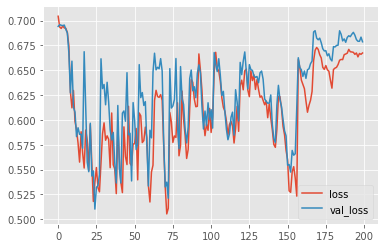

In [33]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

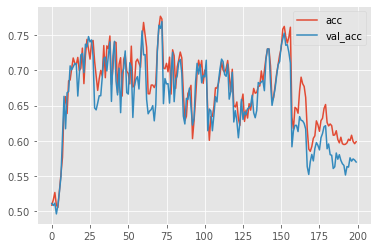

In [34]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### LSTM

In [35]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6942 - accuracy: 0.5096 - val_loss: 0.6945 - val_accuracy: 0.4928
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5132 - val_loss: 0.6942 - val_accuracy: 0.4904
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6946 - val_accuracy: 0.4920
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.4988 - val_loss: 0.6941 - val_accuracy: 0.4912
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5084 - val_loss: 0.6938 - val_accuracy: 0.4928
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5152 - val_loss: 0.6936 - val_accuracy: 0.4936
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5136 - val_loss: 0.6938 - val_accuracy: 0.4944
Epoch 8/200


Epoch 59/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4145 - accuracy: 0.7836 - val_loss: 0.4171 - val_accuracy: 0.7888
Epoch 60/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.7868 - val_loss: 0.4189 - val_accuracy: 0.7764
Epoch 61/200
79/79 [==============================] - 0s 6ms/step - loss: 0.4001 - accuracy: 0.7952 - val_loss: 0.4152 - val_accuracy: 0.8004
Epoch 62/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3950 - accuracy: 0.7984 - val_loss: 0.4227 - val_accuracy: 0.7988
Epoch 63/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3904 - accuracy: 0.7972 - val_loss: 0.4056 - val_accuracy: 0.7976
Epoch 64/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3931 - accuracy: 0.7936 - val_loss: 0.4197 - val_accuracy: 0.8008
Epoch 65/200
79/79 [==============================] - 0s 6ms/step - loss: 0.3903 - accuracy: 0.8008 - val_loss: 0.4479 - val_accuracy: 0.7976
Epoch 

79/79 [==============================] - 0s 6ms/step - loss: 0.0630 - accuracy: 0.9840 - val_loss: 0.0802 - val_accuracy: 0.9792
Epoch 174/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0737 - accuracy: 0.9796 - val_loss: 0.0696 - val_accuracy: 0.9796
Epoch 175/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0751 - accuracy: 0.9816 - val_loss: 0.0776 - val_accuracy: 0.9760
Epoch 176/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0602 - accuracy: 0.9868 - val_loss: 0.1101 - val_accuracy: 0.9708
Epoch 177/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0812 - accuracy: 0.9832 - val_loss: 0.0885 - val_accuracy: 0.9768
Epoch 178/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0601 - accuracy: 0.9880 - val_loss: 0.0804 - val_accuracy: 0.9788
Epoch 179/200
79/79 [==============================] - 0s 6ms/step - loss: 0.0567 - accuracy: 0.9872 - val_loss: 0.0859 - val_accuracy: 0.9772
Epoch 180/200

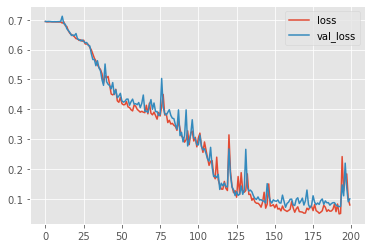

In [36]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

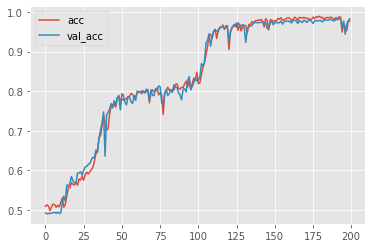

In [37]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Long Distance (T = 20)

In [38]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

### Simple RNN

In [39]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 9ms/step - loss: 0.7055 - accuracy: 0.4956 - val_loss: 0.6941 - val_accuracy: 0.5092
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5112 - val_loss: 0.6965 - val_accuracy: 0.4960
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5104 - val_loss: 0.6959 - val_accuracy: 0.4860
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6940 - accuracy: 0.5104 - val_loss: 0.6979 - val_accuracy: 0.4852
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.6990 - val_accuracy: 0.4828
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5184 - val_loss: 0.6955 - val_accuracy: 0.4996
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5220 - val_loss: 0.7001 - val_accuracy: 0.4936
Epoch 8/200
7

Epoch 59/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6832 - accuracy: 0.5468 - val_loss: 0.7109 - val_accuracy: 0.4660
Epoch 60/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.5540 - val_loss: 0.7113 - val_accuracy: 0.4720
Epoch 61/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6821 - accuracy: 0.5624 - val_loss: 0.7141 - val_accuracy: 0.4688
Epoch 62/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.5576 - val_loss: 0.7098 - val_accuracy: 0.4736
Epoch 63/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6841 - accuracy: 0.5612 - val_loss: 0.7074 - val_accuracy: 0.4820
Epoch 64/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6834 - accuracy: 0.5584 - val_loss: 0.7108 - val_accuracy: 0.4772
Epoch 65/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6857 - accuracy: 0.5492 - val_loss: 0.7142 - val_accuracy: 0.4888
Epoch 

79/79 [==============================] - 0s 5ms/step - loss: 0.6882 - accuracy: 0.5376 - val_loss: 0.7003 - val_accuracy: 0.4864
Epoch 174/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6887 - accuracy: 0.5480 - val_loss: 0.6978 - val_accuracy: 0.4920
Epoch 175/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5288 - val_loss: 0.7004 - val_accuracy: 0.4868
Epoch 176/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5292 - val_loss: 0.7008 - val_accuracy: 0.4884
Epoch 177/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.5400 - val_loss: 0.7009 - val_accuracy: 0.4860
Epoch 178/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5336 - val_loss: 0.6955 - val_accuracy: 0.5040
Epoch 179/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6900 - accuracy: 0.5432 - val_loss: 0.6970 - val_accuracy: 0.5028
Epoch 180/200

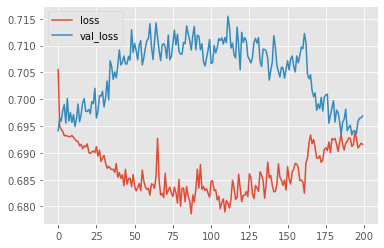

In [40]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

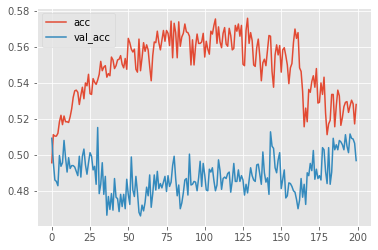

In [41]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### LSTM

In [42]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6942 - accuracy: 0.4956 - val_loss: 0.6967 - val_accuracy: 0.4812
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6932 - accuracy: 0.5120 - val_loss: 0.6941 - val_accuracy: 0.4888
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.5080 - val_loss: 0.6956 - val_accuracy: 0.4812
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5068 - val_loss: 0.6958 - val_accuracy: 0.4840
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6927 - accuracy: 0.5252 - val_loss: 0.6948 - val_accuracy: 0.4808
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6928 - accuracy: 0.5120 - val_loss: 0.6937 - val_accuracy: 0.5032
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5124 - val_loss: 0.6956 - val_accuracy: 0.4908
Epoch 8/200


Epoch 59/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6602 - accuracy: 0.5884 - val_loss: 0.7322 - val_accuracy: 0.4884
Epoch 60/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6595 - accuracy: 0.5904 - val_loss: 0.7352 - val_accuracy: 0.4828
Epoch 61/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6591 - accuracy: 0.5884 - val_loss: 0.7314 - val_accuracy: 0.4796
Epoch 62/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6587 - accuracy: 0.5864 - val_loss: 0.7366 - val_accuracy: 0.4796
Epoch 63/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6627 - accuracy: 0.5844 - val_loss: 0.7370 - val_accuracy: 0.4848
Epoch 64/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6551 - accuracy: 0.5952 - val_loss: 0.7433 - val_accuracy: 0.4732
Epoch 65/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6540 - accuracy: 0.5976 - val_loss: 0.7422 - val_accuracy: 0.4772
Epoch 

79/79 [==============================] - 1s 9ms/step - loss: 0.6480 - accuracy: 0.6016 - val_loss: 0.7410 - val_accuracy: 0.4964
Epoch 174/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6505 - accuracy: 0.6052 - val_loss: 0.7506 - val_accuracy: 0.4952
Epoch 175/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6429 - accuracy: 0.6172 - val_loss: 0.7502 - val_accuracy: 0.4880
Epoch 176/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6476 - accuracy: 0.6144 - val_loss: 0.7567 - val_accuracy: 0.4796
Epoch 177/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6460 - accuracy: 0.6216 - val_loss: 0.7576 - val_accuracy: 0.4820
Epoch 178/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6437 - accuracy: 0.6120 - val_loss: 0.7618 - val_accuracy: 0.4820
Epoch 179/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6435 - accuracy: 0.6100 - val_loss: 0.7578 - val_accuracy: 0.4868
Epoch 180/200

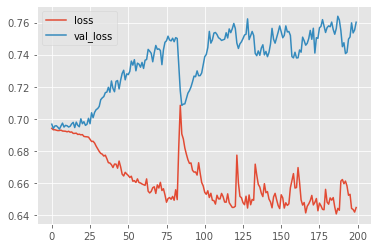

In [43]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

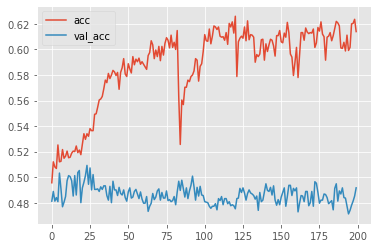

In [44]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### GRU

In [45]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 16ms/step - loss: 0.6947 - accuracy: 0.4904 - val_loss: 0.6954 - val_accuracy: 0.5004
Epoch 2/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5068 - val_loss: 0.6946 - val_accuracy: 0.4992
Epoch 3/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6935 - accuracy: 0.5172 - val_loss: 0.6945 - val_accuracy: 0.4980
Epoch 4/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6959 - val_accuracy: 0.5008
Epoch 5/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6931 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 6/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.5304 - val_loss: 0.6985 - val_accuracy: 0.4800
Epoch 7/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6927 - accuracy: 0.5188 - val_loss: 0.6952 - val_accuracy: 0.4992
Epoch 8

79/79 [==============================] - 1s 9ms/step - loss: 0.2828 - accuracy: 0.9332 - val_loss: 0.2636 - val_accuracy: 0.9340
Epoch 116/400
79/79 [==============================] - 1s 9ms/step - loss: 0.2899 - accuracy: 0.9224 - val_loss: 0.2555 - val_accuracy: 0.9364
Epoch 117/400
79/79 [==============================] - 1s 9ms/step - loss: 0.2312 - accuracy: 0.9424 - val_loss: 0.2304 - val_accuracy: 0.9424
Epoch 118/400
79/79 [==============================] - 1s 9ms/step - loss: 0.2224 - accuracy: 0.9456 - val_loss: 0.2247 - val_accuracy: 0.9460
Epoch 119/400
79/79 [==============================] - 1s 9ms/step - loss: 0.2036 - accuracy: 0.9496 - val_loss: 0.2223 - val_accuracy: 0.9432
Epoch 120/400
79/79 [==============================] - 1s 9ms/step - loss: 0.2033 - accuracy: 0.9468 - val_loss: 0.2566 - val_accuracy: 0.9296
Epoch 121/400
79/79 [==============================] - 1s 9ms/step - loss: 0.2061 - accuracy: 0.9448 - val_loss: 0.2268 - val_accuracy: 0.9448
Epoch 122/400

79/79 [==============================] - 1s 10ms/step - loss: 0.9407 - accuracy: 0.5272 - val_loss: 0.8292 - val_accuracy: 0.5348
Epoch 230/400
79/79 [==============================] - 1s 9ms/step - loss: 0.8120 - accuracy: 0.5804 - val_loss: 0.8122 - val_accuracy: 0.6024
Epoch 231/400
79/79 [==============================] - 1s 10ms/step - loss: 0.8211 - accuracy: 0.5980 - val_loss: 0.8191 - val_accuracy: 0.5756
Epoch 232/400
79/79 [==============================] - 1s 10ms/step - loss: 0.8477 - accuracy: 0.5648 - val_loss: 0.8269 - val_accuracy: 0.5364
Epoch 233/400
79/79 [==============================] - 1s 9ms/step - loss: 0.8349 - accuracy: 0.5592 - val_loss: 0.8099 - val_accuracy: 0.5392
Epoch 234/400
79/79 [==============================] - 1s 10ms/step - loss: 0.7837 - accuracy: 0.5296 - val_loss: 0.7651 - val_accuracy: 0.5188
Epoch 235/400
79/79 [==============================] - 1s 9ms/step - loss: 0.7538 - accuracy: 0.5196 - val_loss: 0.7489 - val_accuracy: 0.5036
Epoch 236

79/79 [==============================] - 1s 9ms/step - loss: 0.6866 - accuracy: 0.5564 - val_loss: 0.7100 - val_accuracy: 0.5028
Epoch 344/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6918 - accuracy: 0.5448 - val_loss: 0.6986 - val_accuracy: 0.5152
Epoch 345/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6900 - accuracy: 0.5476 - val_loss: 0.6965 - val_accuracy: 0.5208
Epoch 346/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6899 - accuracy: 0.5424 - val_loss: 0.6943 - val_accuracy: 0.5296
Epoch 347/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6884 - accuracy: 0.5424 - val_loss: 0.6944 - val_accuracy: 0.5164
Epoch 348/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6871 - accuracy: 0.5532 - val_loss: 0.6941 - val_accuracy: 0.5316
Epoch 349/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6840 - accuracy: 0.5692 - val_loss: 0.6898 - val_accuracy: 0.5596
Epoch 350/4

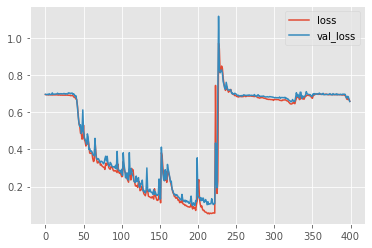

In [46]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

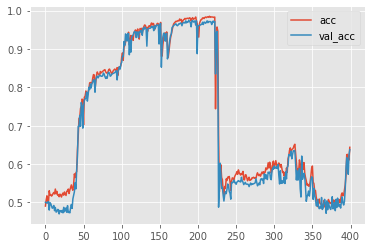

In [47]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### Long Distance (T = 30)

In [48]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    y = get_label(x, 0, 1, 2) # long distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

### LSTM

In [49]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 2s 19ms/step - loss: 0.6945 - accuracy: 0.5036 - val_loss: 0.6951 - val_accuracy: 0.5060
Epoch 2/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6944 - accuracy: 0.5052 - val_loss: 0.6943 - val_accuracy: 0.5056
Epoch 3/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6936 - accuracy: 0.4980 - val_loss: 0.6936 - val_accuracy: 0.5056
Epoch 4/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6936 - accuracy: 0.4984 - val_loss: 0.6933 - val_accuracy: 0.5076
Epoch 5/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6937 - accuracy: 0.5052 - val_loss: 0.6933 - val_accuracy: 0.5088
Epoch 6/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6934 - accuracy: 0.5036 - val_loss: 0.6938 - val_accuracy: 0.5072
Epoch 7/400
79/79 [==============================] - 1s 13ms/step - loss: 0.6931 - accuracy: 0.5108 - val_loss: 0.6937 - val_accuracy: 0.5048
Epoch 

79/79 [==============================] - 1s 12ms/step - loss: 0.5120 - accuracy: 0.7424 - val_loss: 0.9388 - val_accuracy: 0.5040
Epoch 116/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5092 - accuracy: 0.7508 - val_loss: 0.9156 - val_accuracy: 0.4988
Epoch 117/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4889 - accuracy: 0.7660 - val_loss: 0.9472 - val_accuracy: 0.5116
Epoch 118/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5167 - accuracy: 0.7428 - val_loss: 0.9479 - val_accuracy: 0.4896
Epoch 119/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5295 - accuracy: 0.7384 - val_loss: 0.9402 - val_accuracy: 0.5044
Epoch 120/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5390 - accuracy: 0.7288 - val_loss: 0.9194 - val_accuracy: 0.5040
Epoch 121/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5039 - accuracy: 0.7544 - val_loss: 0.9462 - val_accuracy: 0.4976
Epoch 

Epoch 172/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4589 - accuracy: 0.7852 - val_loss: 1.0148 - val_accuracy: 0.5040
Epoch 173/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4999 - accuracy: 0.7552 - val_loss: 0.9971 - val_accuracy: 0.4944
Epoch 174/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4800 - accuracy: 0.7684 - val_loss: 0.9925 - val_accuracy: 0.5084
Epoch 175/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4907 - accuracy: 0.7660 - val_loss: 0.9794 - val_accuracy: 0.4992
Epoch 176/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5015 - accuracy: 0.7552 - val_loss: 0.9922 - val_accuracy: 0.5032
Epoch 177/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4570 - accuracy: 0.7904 - val_loss: 1.0228 - val_accuracy: 0.5008
Epoch 178/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4816 - accuracy: 0.7764 - val_loss: 1.0014 - val_accuracy:

Epoch 229/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4517 - accuracy: 0.7800 - val_loss: 1.0533 - val_accuracy: 0.5112
Epoch 230/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5343 - accuracy: 0.7352 - val_loss: 1.0353 - val_accuracy: 0.4980
Epoch 231/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5727 - accuracy: 0.7148 - val_loss: 0.9926 - val_accuracy: 0.5088
Epoch 232/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5322 - accuracy: 0.7280 - val_loss: 0.9705 - val_accuracy: 0.4956
Epoch 233/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4801 - accuracy: 0.7712 - val_loss: 0.9545 - val_accuracy: 0.5088
Epoch 234/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4706 - accuracy: 0.7772 - val_loss: 1.0184 - val_accuracy: 0.4968
Epoch 235/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4781 - accuracy: 0.7732 - val_loss: 1.0160 - val_accuracy:

Epoch 286/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5427 - accuracy: 0.7320 - val_loss: 0.9969 - val_accuracy: 0.4968
Epoch 287/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5313 - accuracy: 0.7308 - val_loss: 0.9763 - val_accuracy: 0.4932
Epoch 288/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4776 - accuracy: 0.7752 - val_loss: 0.9744 - val_accuracy: 0.5068
Epoch 289/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4648 - accuracy: 0.7748 - val_loss: 1.0080 - val_accuracy: 0.4976
Epoch 290/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4379 - accuracy: 0.7976 - val_loss: 1.0364 - val_accuracy: 0.5040
Epoch 291/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4386 - accuracy: 0.7876 - val_loss: 1.0429 - val_accuracy: 0.4996
Epoch 292/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4417 - accuracy: 0.7856 - val_loss: 1.0680 - val_accuracy:

Epoch 343/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4702 - accuracy: 0.7784 - val_loss: 0.9794 - val_accuracy: 0.5096
Epoch 344/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4616 - accuracy: 0.7808 - val_loss: 0.9745 - val_accuracy: 0.5256
Epoch 345/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4852 - accuracy: 0.7644 - val_loss: 1.0021 - val_accuracy: 0.4924
Epoch 346/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5037 - accuracy: 0.7476 - val_loss: 1.0105 - val_accuracy: 0.5032
Epoch 347/400
79/79 [==============================] - 1s 12ms/step - loss: 0.5034 - accuracy: 0.7472 - val_loss: 0.9399 - val_accuracy: 0.5112
Epoch 348/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4855 - accuracy: 0.7588 - val_loss: 0.9397 - val_accuracy: 0.5156
Epoch 349/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4520 - accuracy: 0.7900 - val_loss: 0.9972 - val_accuracy:

Epoch 400/400
79/79 [==============================] - 1s 12ms/step - loss: 0.4705 - accuracy: 0.7764 - val_loss: 1.0869 - val_accuracy: 0.5240


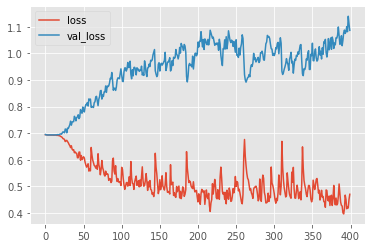

In [50]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

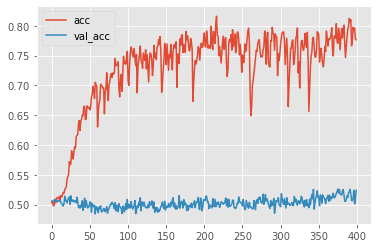

In [51]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

### LSTM with Global Max Pooling

In [52]:
# Now try a LSTM with Global Max Pooling
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 2s 19ms/step - loss: 0.6949 - accuracy: 0.4944 - val_loss: 0.6937 - val_accuracy: 0.5004
Epoch 2/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6932 - accuracy: 0.5128 - val_loss: 0.6949 - val_accuracy: 0.5060
Epoch 3/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6936 - accuracy: 0.5148 - val_loss: 0.6951 - val_accuracy: 0.5060
Epoch 4/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6929 - accuracy: 0.5108 - val_loss: 0.6938 - val_accuracy: 0.5060
Epoch 5/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6945 - accuracy: 0.4980 - val_loss: 0.6933 - val_accuracy: 0.5060
Epoch 6/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6927 - accuracy: 0.5088 - val_loss: 0.6934 - val_accuracy: 0.4936
Epoch 7/100
79/79 [==============================] - 1s 12ms/step - loss: 0.6920 - accuracy: 0.5112 - val_loss: 0.6938 - val_accuracy: 0.5076
Epoch 

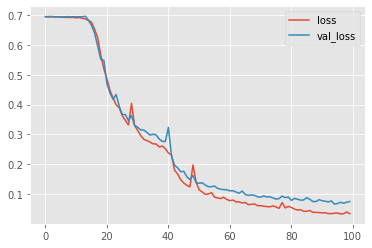

In [53]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

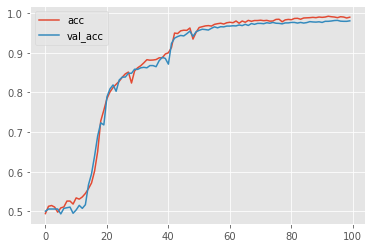

In [54]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

- Simple RNN
- GRU
- LSTM
- LSTM + Global Max Pooling